<a href="https://colab.research.google.com/github/Aditya-singh32/My_projects/blob/main/ClassificationUsingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris-dataset and NN

In [1]:
# Standard Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Project Especific Imports
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [ ]:
# Let's import the dataset
from sklearn import datasets
iris = datasets.load_iris()
print(iris)

In [3]:
X = iris.data
y = iris.target
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [4]:
X.shape,y.shape

((150, 4), (150,))

In [5]:
X = tf.constant(X,shape=(150,4))
y = pd.get_dummies(y)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation='relu',input_shape=(4,)),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(250,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics='accuracy')

model.fit(X,y,epochs=500,validation_split=.2,verbose=0)

In [7]:
hist = model.history.history
epoch = model.history.epoch

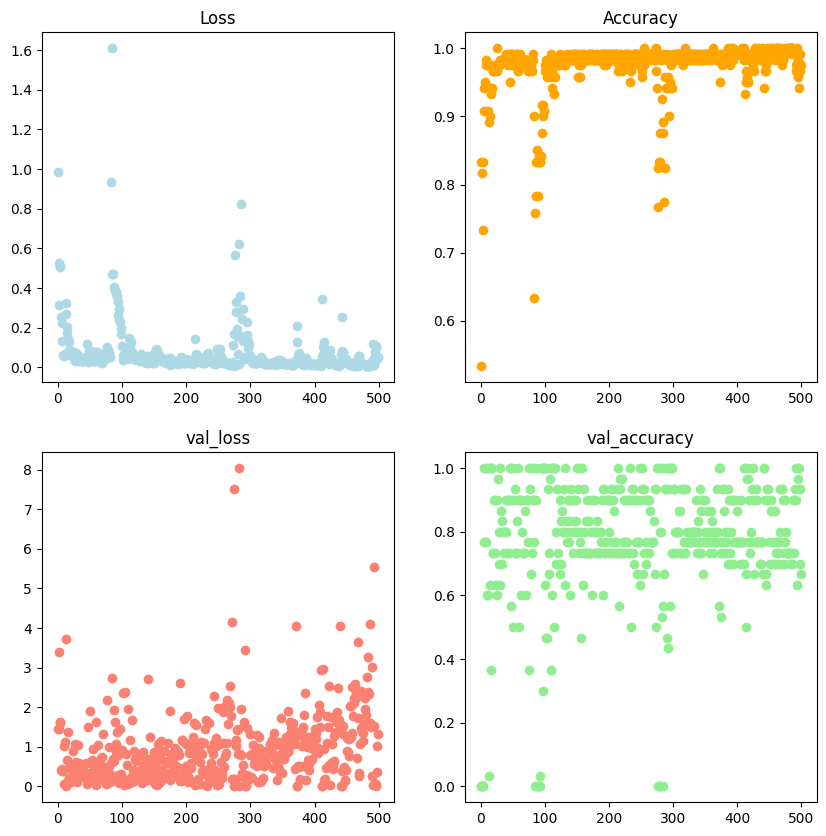

In [8]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(10,10))

ax0.scatter(epoch,hist['loss'],c='lightblue')
ax0.title.set_text('Loss')

ax1.scatter(epoch,hist['accuracy'],c='orange')
ax1.title.set_text('Accuracy')

ax2.scatter(epoch,hist['val_loss'],c='salmon')
ax2.title.set_text('val_loss')

ax3.scatter(epoch,hist['val_accuracy'],c='lightgreen')
ax3.title.set_text('val_accuracy')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 dense_6 (Dense)             (None, 100)               2

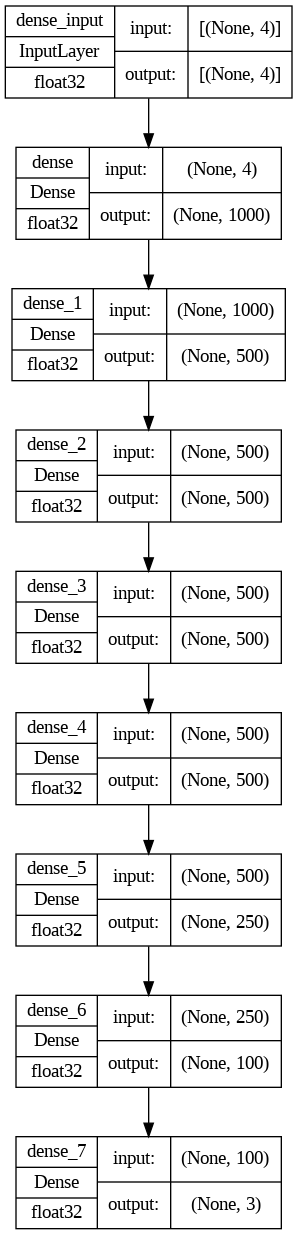

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_dtype=True)

In [11]:
model.evaluate(X,y)

5/5 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.9133


[0.310086727142334, 0.9133333563804626]